## Analysis Function 1

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
from pathlib import Path

In [2]:
sys.path.insert(0, str(Path.cwd().parent))

In [3]:
class BlackBox:
    """
    This class implements a simple interface to the black-box service for the ODM course.
    """

    def __init__(self, token: int, endpoint: str = 'http://ls-stat-ml.uni-muenster.de:7300/'):
        self.endpoint = endpoint
        self.token = token

    def set_endpoint(self, endpoint: str):
        self.endpoint = endpoint

    def evaluate(self, objective: str, parameters: list) -> float:
        r = requests.post(url=self.endpoint + "compute/" + objective,
                          json={"parameters": [str(v) for v in parameters], "token": self.token})
        return float(r.json())

    def evaluate_gradient(self, objective: str, parameters: list) -> list:
        r = requests.post(url=self.endpoint + "compute_gradient/" + objective,
                          json={"parameters": [str(v) for v in parameters], "token": self.token})
        return r.json()

In [4]:
group_number = 11
bb = BlackBox(token = group_number)

In [5]:
x0 = [-3, -3]  # Starting point
current_function = "Function1"
np.set_printoptions(suppress=True, precision=20)

In [6]:
def create_grid(x_range, y_range, resolution):
    """Create a grid for visualization."""
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    return X, Y

def evaluate_on_grid(bb, objective, X, Y):
    """Evaluate the objective function on a grid."""
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = bb.evaluate(objective, [X[i, j], Y[i, j]])
    return Z

Evaluating Function1...


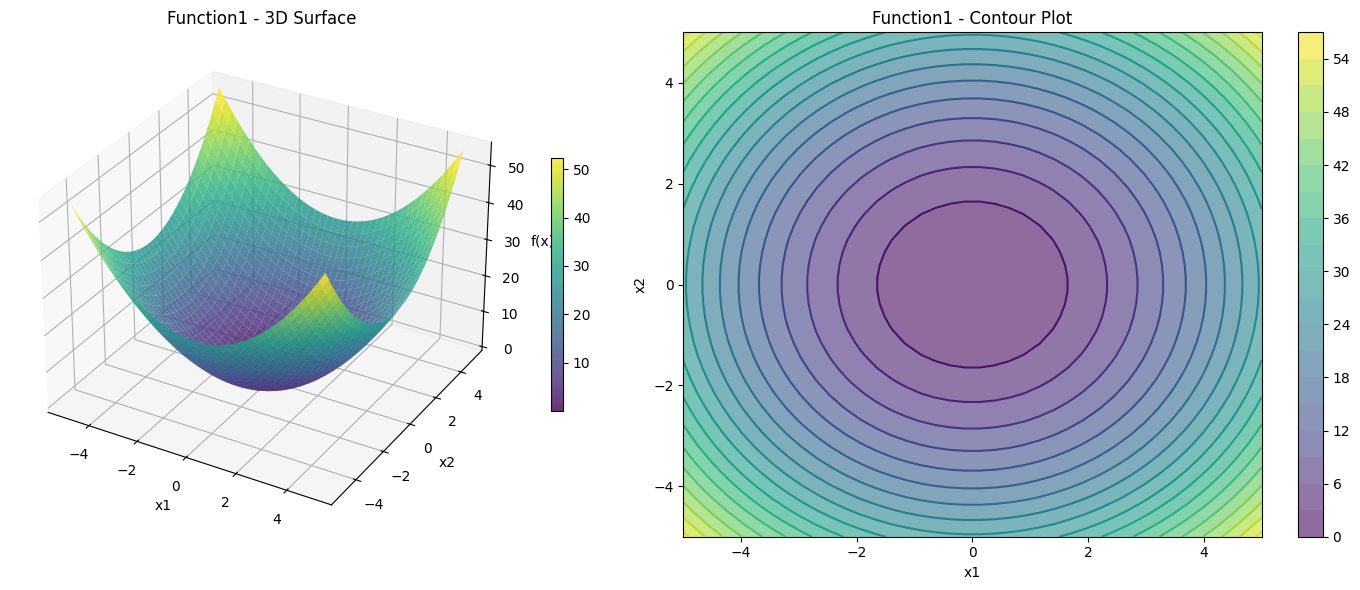

In [18]:
x_range = (-5, 5)
y_range = (-5, 5)
resolution = 40

# Create grid
X, Y = create_grid(x_range, y_range, resolution)

# Evaluate function on grid
print(f"Evaluating {current_function}...")
Z = evaluate_on_grid(bb, current_function, X, Y)

# Save the data for later use
grid_data = {'X': X, 'Y': Y, 'Z': Z}

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D surface plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8, antialiased=True)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x)')
ax1.set_title(f'{current_function} - 3D Surface')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
contourf = ax2.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title(f'{current_function} - Contour Plot')
fig.colorbar(contourf, ax=ax2)

plt.tight_layout()
plt.show()

In [7]:
# Import gradient-based (indirect) optimization methods
from optimizer.indirect_methods import sgd, momentum, rmsprop, adam

# Import derivative-free (direct) optimization methods
from optimizer.direct_methods import coordinate_search, hooke_jeeves, nelder_mead

In [15]:
# SGD
x_sgd, history_sgd = sgd(bb, current_function, x0, learning_rate=0.01, max_iter=500)
print(f"SGD Result: x = {x_sgd}, f(x) = {bb.evaluate(current_function, x_sgd.tolist())}")

SGD: 499 iterations
SGD Result: x = [-0.00004431478519527482 -0.00004431478519527482], f(x) = 4.320360411187368e-09


In [9]:
# Momentum
x_momentum, history_momentum = momentum(bb, current_function, x0, learning_rate=0.01, beta=0.9, max_iter=500)
print(f"Momentum Result: x = {x_momentum}, f(x) = {bb.evaluate(current_function, x_momentum.tolist())}")

Converged after 255 iterations
Momentum: 255 iterations
Momentum Result: x = [-0.00000025540045547726 -0.00000025540045547726], f(x) = 1.4350466384758373e-13


In [10]:
# RMSProp
x_rmsprop, history_rmsprop = rmsprop(bb, current_function, x0, learning_rate=0.01, beta=0.9, max_iter=500)
print(f"RMSProp Result: x = {x_rmsprop}, f(x) = {bb.evaluate(current_function, x_rmsprop.tolist())}")

Converged after 357 iterations
RMSProp: 357 iterations
RMSProp Result: x = [-0.00000023212844596066 -0.00000023212844596066], f(x) = 1.1854395393304858e-13


In [11]:
# Adam
x_adam, history_adam = adam(bb, current_function, x0, learning_rate=0.01, beta1=0.9, beta2=0.999, max_iter=500)
print(f"Adam Result: x = {x_adam}, f(x) = {bb.evaluate(current_function, x_adam.tolist())}")

Adam: 499 iterations
Adam Result: x = [-0.19298112575523993 -0.19298112575523993], f(x) = 0.08193177277507141


In [12]:
# Coordinate Search
x_coord_search, history_coord_search = coordinate_search(bb, current_function, x0, max_iter=500)
print(f"Coordinate Search Result: x = {x_coord_search}, f(x) = {bb.evaluate(current_function, x_coord_search.tolist())}")

Coordinate Search: 47 iterations
Coordinate Search Result: x = [0.00000000000000152656 0.00000000000000152656], f(x) = 5.126825511958822e-30


In [13]:
# Hooke-Jeeves
x_hooke_jeeves, history_hooke_jeeves = hooke_jeeves(bb, current_function, x0, step_size=0.1, reduction_factor=0.5, max_iter=500)
print(f"Hooke-Jeeves Result: x = {x_hooke_jeeves}, f(x) = {bb.evaluate(current_function, x_hooke_jeeves.tolist())}")

Hooke & Jeeves: 27 iterations
Hooke-Jeeves Result: x = [0.00000000000000163758 0.00000000000000163758], f(x) = 5.899662680042532e-30


In [14]:
# Nelder-Mead
x_nelder_mead, history_nelder_mead = nelder_mead(bb, current_function, x0, max_iter=500)
print(f"Nelder-Mead Result: x = {x_nelder_mead}, f(x) = {bb.evaluate(current_function, x_nelder_mead.tolist())}")

Nelder-Mead converged after 49 iterations
Nelder-Mead: 49 iterations
Nelder-Mead Result: x = [-0.00000071971983625288  0.00000042109709988701], f(x) = 7.648513512520347e-13


Visualize

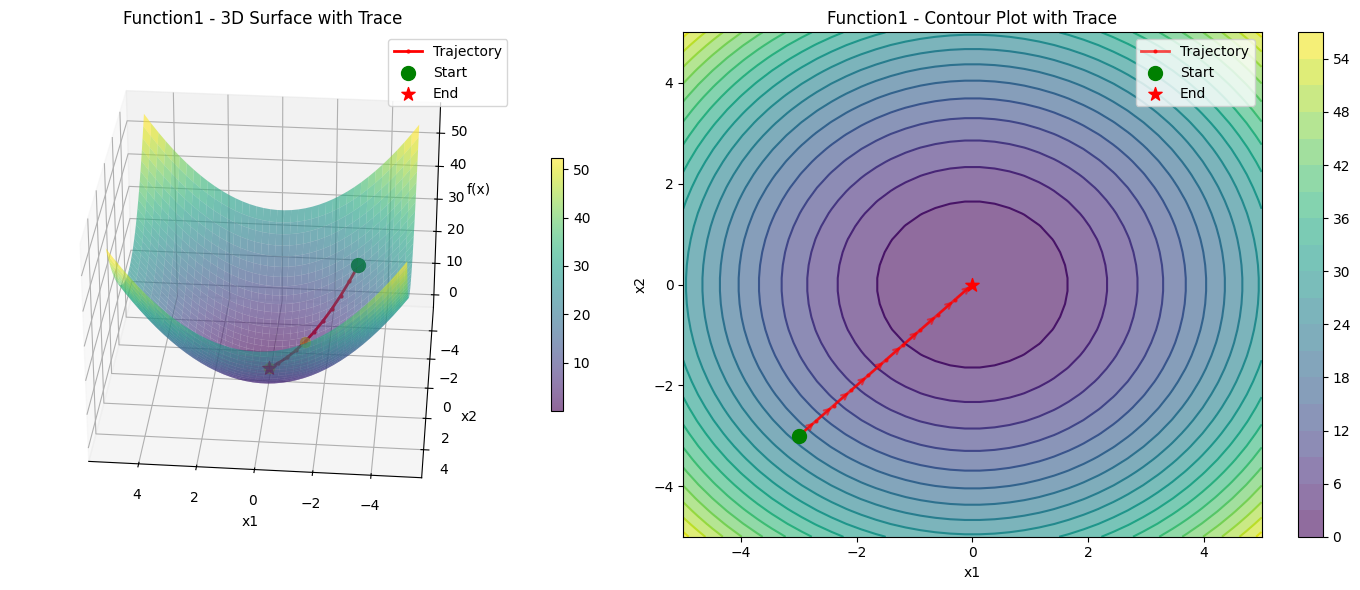

In [36]:
# Visualize optimizer trace on the saved plots
fig = plt.figure(figsize=(15, 6))

# Extract trajectory from history
trajectory = np.array([point[1] for point in history_hooke_jeeves])
f_values = np.array([point[2] for point in history_hooke_jeeves])

# 3D surface plot with optimizer trace
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(grid_data['X'], grid_data['Y'], grid_data['Z'], 
                        cmap=cm.viridis, alpha=0.6, antialiased=True)

# Plot the optimizer trajectory
ax1.plot(trajectory[:, 0], trajectory[:, 1], f_values, 
         'r.-', linewidth=2, markersize=4, label='Trajectory')

# Add some intermediate points to show progression
n_markers = min(5, len(trajectory))
marker_indices = np.linspace(0, len(trajectory)-1, n_markers, dtype=int)
for idx in marker_indices[1:-1]:  # Skip start and end
    ax1.scatter(trajectory[idx, 0], trajectory[idx, 1], f_values[idx],
               color='yellow', s=50, marker='o', alpha=0.7, zorder=4)

ax1.scatter(trajectory[0, 0], trajectory[0, 1], f_values[0], 
           color='green', s=100, marker='o', label='Start', zorder=5)
ax1.scatter(trajectory[-1, 0], trajectory[-1, 1], f_values[-1], 
           color='red', s=100, marker='*', label='End', zorder=5)

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x)')
ax1.set_title(f'{current_function} - 3D Surface with Trace')
ax1.legend()
ax1.view_init(elev=30, azim=95)  # Adjust viewing angle
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot with optimizer trace
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(grid_data['X'], grid_data['Y'], grid_data['Z'], 
                      levels=20, cmap='viridis')
contourf = ax2.contourf(grid_data['X'], grid_data['Y'], grid_data['Z'], 
                        levels=20, cmap='viridis', alpha=0.6)

# Plot the optimizer trajectory with arrows to show direction
for i in range(len(trajectory)-1):
    ax2.annotate('', xy=trajectory[i+1], xytext=trajectory[i],
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5, alpha=0.6))

ax2.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', 
         linewidth=2, markersize=4, label='Trajectory', alpha=0.7)
ax2.scatter(trajectory[0, 0], trajectory[0, 1], 
           color='green', s=100, marker='o', label='Start', zorder=5)
ax2.scatter(trajectory[-1, 0], trajectory[-1, 1], 
           color='red', s=100, marker='*', label='End', zorder=5)

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title(f'{current_function} - Contour Plot with Trace')
ax2.legend()
fig.colorbar(contourf, ax=ax2)

plt.tight_layout()
plt.savefig("hooke_jeeves_trace_function1.png")
plt.show()